## Cross Nation Analysis

In [87]:
# Removing rows where Nation is "Unknown"
df = df[df["Nation"] != "Unknown"]

In [88]:
nation_stats = df.groupby("Nation")["AveragePrice"].agg(["count", "mean", "median", "min", "max", "std"])
print("Descriptive Statistics by Nation:")
print(nation_stats)

Descriptive Statistics by Nation:
                  count   mean  median   min     max    std
Nation                                                     
England           56112 253705  220136 62420 1531416 136027
Northern Ireland   2016 131444  127932 82705  208366  26566
Scotland           5544 147643  137774 80482  325941  42841
Wales              3864 156672  151425 65648  341987  45037


In [89]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [90]:
nation_year_price = (
    df.groupby(["Nation", "Year"], as_index=False)["AveragePrice"]
      .mean()
      .rename(columns={"AveragePrice": "AvgPriceYear"})
)

print(nation_year_price)

              Nation  Year  AvgPriceYear
0            England  2010        193144
1            England  2011        192317
2            England  2012        195817
3            England  2013        202509
4            England  2014        221686
5            England  2015        238377
6            England  2016        257912
7            England  2017        269464
8            England  2018        275297
9            England  2019        275301
10           England  2020        281223
11           England  2021        298259
12           England  2022        324137
13           England  2023        326422
14  Northern Ireland  2010        131390
15  Northern Ireland  2011        116182
16  Northern Ireland  2012        103267
17  Northern Ireland  2013        100135
18  Northern Ireland  2014        107376
19  Northern Ireland  2015        115021
20  Northern Ireland  2016        122636
21  Northern Ireland  2017        127518
22  Northern Ireland  2018        133405
23  Northern Ire

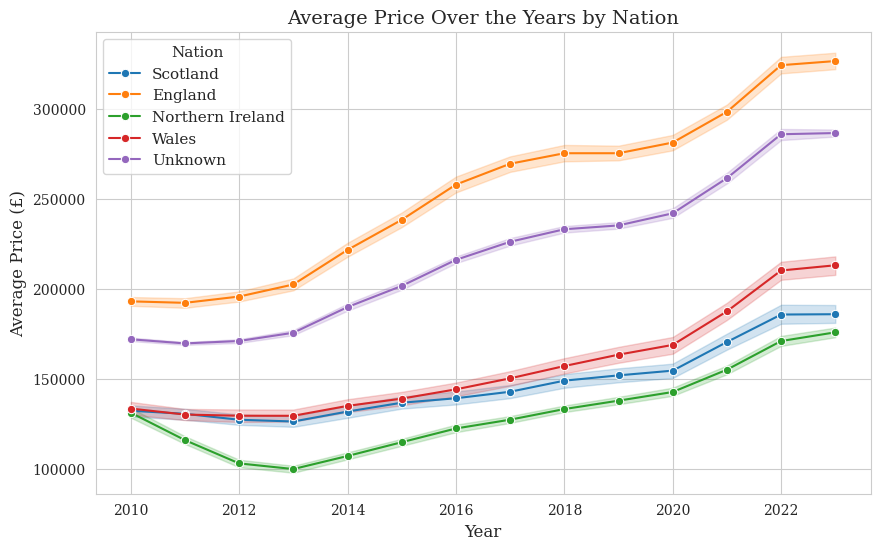

In [91]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_processed, x="Year", y="AveragePrice", hue="Nation", marker="o")
plt.title("Average Price Over the Years by Nation")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend(title="Nation")
plt.show()

In [92]:
if 'Year' not in df.columns:
  if 'Date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Date']):
      df['Year'] = df['Date'].dt.year
  else:
      print("Error: Cannot create 'Year' column. 'Date' column missing or not datetime.")
      exit()


# --- Calculating annual average NORMAL prices by Nation ---
# Group by Nation and Year, calculate the mean of AveragePrice
annual_prices = df.groupby(["Nation", "Year"])["AveragePrice"].mean().reset_index()

# Pivot data: Years as rows, Nations as columns
pivot_prices = annual_prices.pivot(index="Year", columns="Nation", values="AveragePrice")

# --- Computing Year-over-Year percentage change directly ---
yoy_pct_change = pivot_prices.pct_change() * 100

# Printing the Year-over-Year percentage change
print("Year-over-Year % Change in Average House Prices by Nation (Using AveragePrice):")
# The first row will be NaN because there's no previous year to compare with
print(yoy_pct_change.round(2).to_markdown(numalign="left", stralign="left"))

Year-over-Year % Change in Average House Prices by Nation (Using AveragePrice):
| Year   | England   | Northern Ireland   | Scotland   | Wales   |
|:-------|:----------|:-------------------|:-----------|:--------|
| 2010   | nan       | nan                | nan        | nan     |
| 2011   | -0.43     | -11.57             | -1.3       | -2.49   |
| 2012   | 1.82      | -11.12             | -2.52      | -0.5    |
| 2013   | 3.42      | -3.03              | -0.76      | -0.02   |
| 2014   | 9.47      | 7.23               | 4.36       | 4.24    |
| 2015   | 7.53      | 7.12               | 3.71       | 2.98    |
| 2016   | 8.2       | 6.62               | 1.8        | 3.7     |
| 2017   | 4.48      | 3.98               | 2.59       | 4.22    |
| 2018   | 2.16      | 4.62               | 4.3        | 4.53    |
| 2019   | 0         | 3.49               | 1.97       | 4.01    |
| 2020   | 2.15      | 3.48               | 1.72       | 3.31    |
| 2021   | 6.06      | 8.67               | 10.26

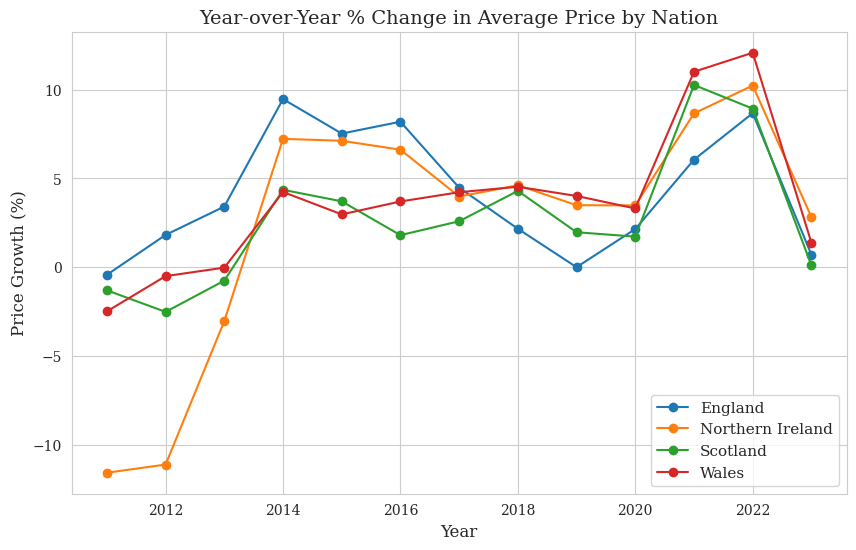

In [93]:
plt.figure(figsize=(10, 6))
for nation in yoy_pct_change.columns:
    plt.plot(yoy_pct_change.index, yoy_pct_change[nation], marker="o", label=nation)

plt.title("Year-over-Year % Change in Average Price by Nation")
plt.xlabel("Year")
plt.ylabel("Price Growth (%)")
plt.legend()
plt.show()

In [94]:
# Grouping data to get total annual sales by nation
nation_year_sales = (
    df.groupby(["Nation", "Year"], as_index=False)["SalesVolume"]
      .sum()
      .rename(columns={"SalesVolume": "TotalSalesVolume"})
)

pd.set_option('display.float_format', '{:.0f}'.format)

# Displaying the DataFrame without scientific notation
print(nation_year_sales)

              Nation  Year  TotalSalesVolume
0            England  2010           2318917
1            England  2011           2314159
2            England  2012           2349087
3            England  2013           2813690
4            England  2014           3331230
5            England  2015           3304693
6            England  2016           3280092
7            England  2017           3229553
8            England  2018           3114685
9            England  2019           3009009
10           England  2020           2532412
11           England  2021           3887192
12           England  2022           3207284
13           England  2023           2320641
14  Northern Ireland  2010             21436
15  Northern Ireland  2011             22608
16  Northern Ireland  2012             27256
17  Northern Ireland  2013             33148
18  Northern Ireland  2014             42447
19  Northern Ireland  2015             43792
20  Northern Ireland  2016             45986
21  Northe

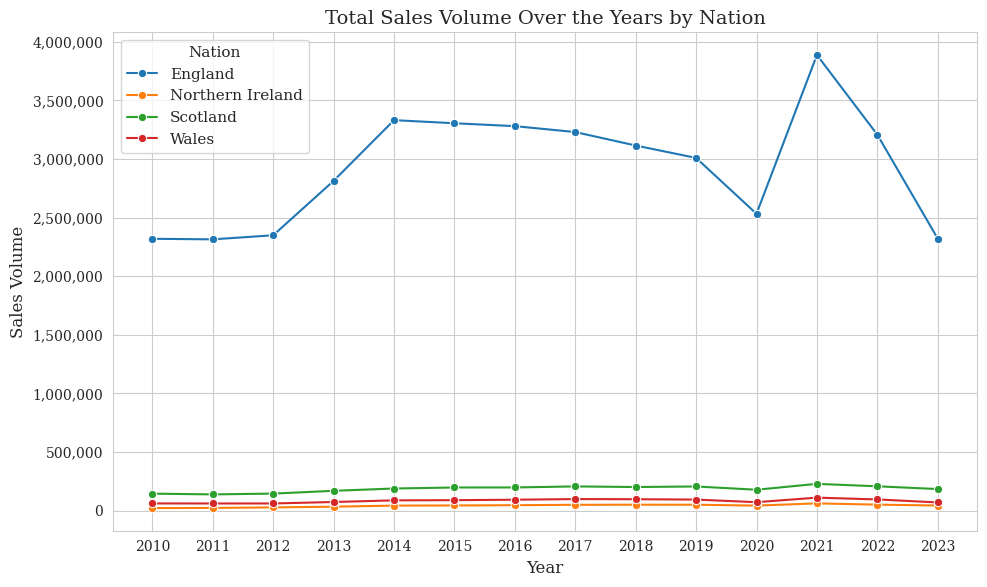

In [95]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=nation_year_sales, x="Year", y="TotalSalesVolume", hue="Nation", marker="o")

# Fixing scientific notation on y-axis by using ticker formatting
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Total Sales Volume Over the Years by Nation")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend(title="Nation")
plt.xticks(nation_year_sales["Year"].unique())  # Ensures all years appear clearly
plt.tight_layout()
plt.show()

In [96]:
cash_mortgage_year = (
    df.groupby(["Nation", "Year"], as_index=False)[["CashSalesVolume", "MortgageSalesVolume"]]
      .sum()
)

print(cash_mortgage_year)

              Nation  Year  CashSalesVolume  MortgageSalesVolume
0            England  2010           892248              2116416
1            England  2011           892248              2116416
2            England  2012           753616              1595452
3            England  2013           931554              1882090
4            England  2014          1091361              2239690
5            England  2015          1058658              2242338
6            England  2016          1016832              2260756
7            England  2017          1010756              2217185
8            England  2018           889665              2223317
9            England  2019           812742              2166196
10           England  2020           690021              1777336
11           England  2021          1093341              2782770
12           England  2022           889060              2283521
13           England  2023           749934              1486796
14  Northern Ireland  201

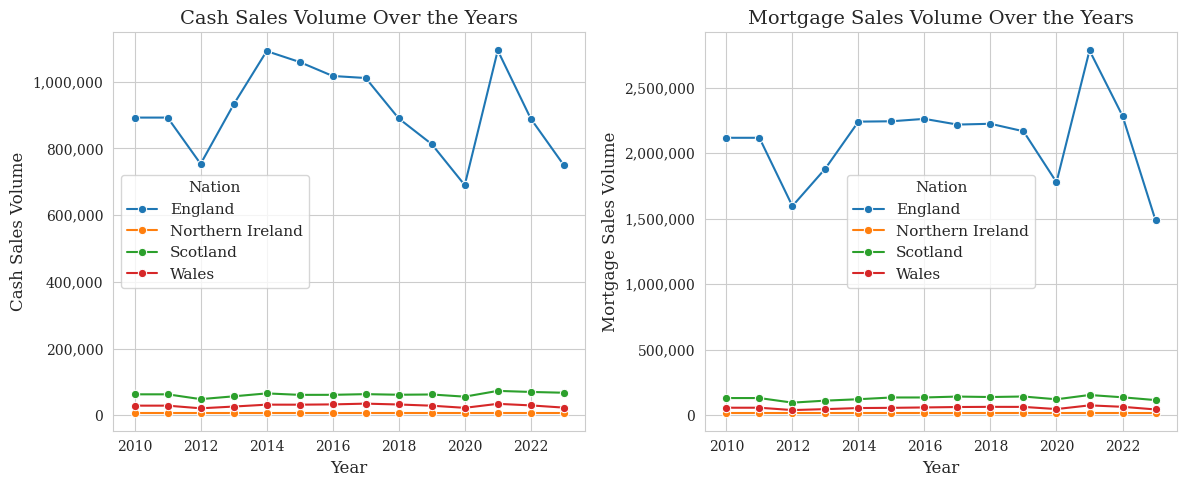

In [97]:
plt.figure(figsize=(12, 5))

# Subplot for Cash Sales
plt.subplot(1, 2, 1)
sns.lineplot(data=cash_mortgage_year, x="Year", y="CashSalesVolume", hue="Nation", marker="o")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Cash Sales Volume Over the Years")
plt.xlabel("Year")
plt.ylabel("Cash Sales Volume")

# Subplot for Mortgage Sales
plt.subplot(1, 2, 2)
sns.lineplot(data=cash_mortgage_year, x="Year", y="MortgageSalesVolume", hue="Nation", marker="o")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Mortgage Sales Volume Over the Years")
plt.xlabel("Year")
plt.ylabel("Mortgage Sales Volume")

plt.tight_layout()
plt.show()

In [98]:
property_types = ["DetachedPrice", "SemiDetachedPrice", "TerracedPrice", "FlatPrice"]
df_prop = df.groupby(["Nation", "Year"], as_index=False)[property_types].mean()

print(df_prop)

              Nation  Year  DetachedPrice  SemiDetachedPrice  TerracedPrice  \
0            England  2010         329513             212995         174197   
1            England  2011         333382             213586         173607   
2            England  2012         338407             219203         178561   
3            England  2013         352726             229006         186150   
4            England  2014         387065             252531         204606   
5            England  2015         418156             271778         219182   
6            England  2016         452601             293236         235781   
7            England  2017         471980             304543         243904   
8            England  2018         483697             313186         249554   
9            England  2019         484630             313788         249644   
10           England  2020         498545             323670         257247   
11           England  2021         524517           

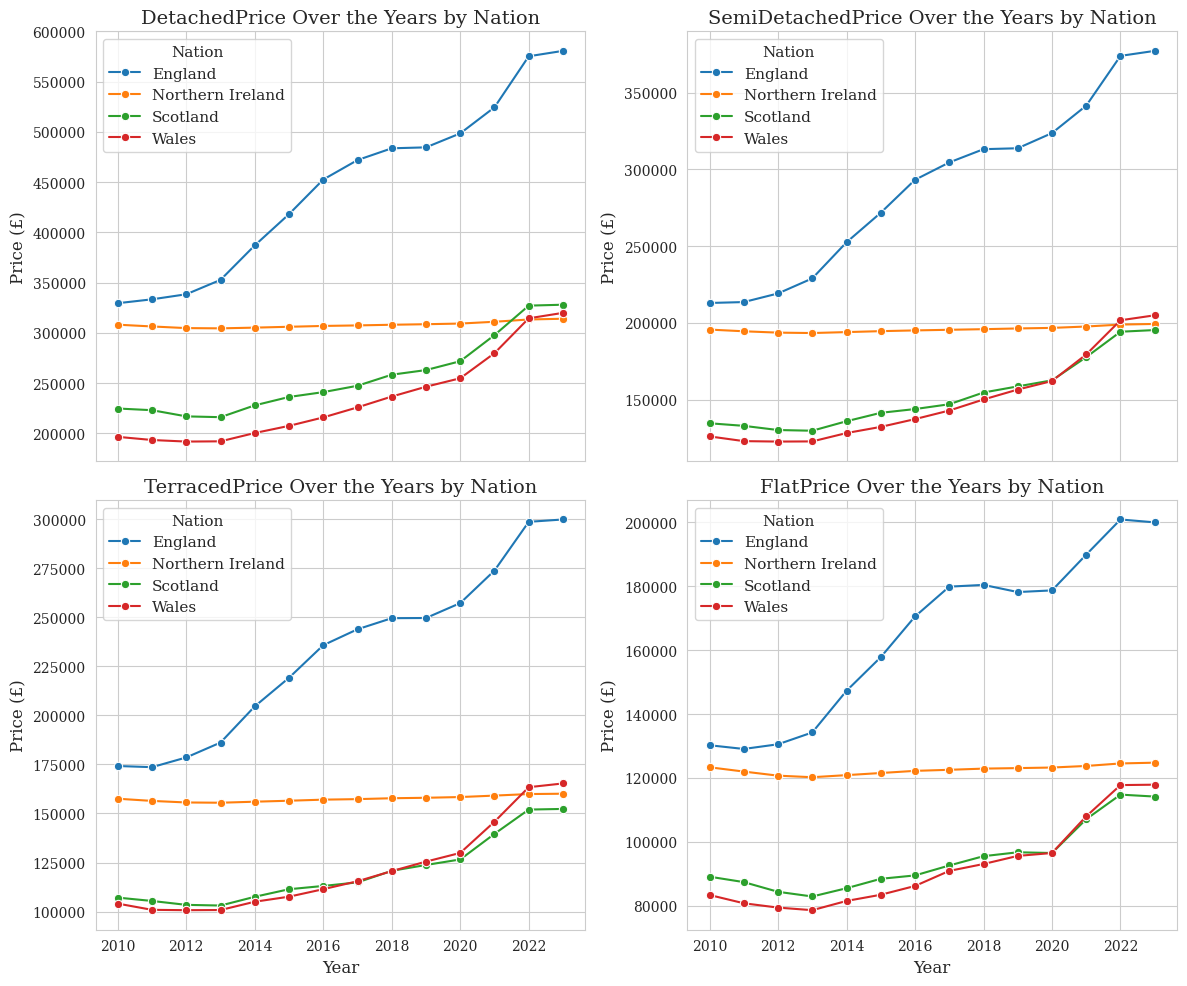

In [99]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

for ax, prop_type in zip(axes.flatten(), property_types):
    sns.lineplot(data=df_prop, x="Year", y=prop_type, hue="Nation", marker="o", ax=ax)
    ax.set_title(f"{prop_type} Over the Years by Nation")
    ax.set_xlabel("Year")
    ax.set_ylabel("Price (£)")
    ax.legend().set_title("Nation")

plt.tight_layout()
plt.show()

In [100]:
# Geospatial Visualization of UK House Prices	56
shapefile_path = "LAD_DEC_2023_UK_BUC.shp"
gdf_shape = gpd.read_file(shapefile_path)

print(gdf_shape.head())
print("\nColumns in shapefile:", gdf_shape.columns)
print(gdf_shape[["LAD23CD", "LAD23NM"]].head())
df.rename(columns={"AreaCode": "LAD23CD"}, inplace=True)
gdf_merged = gdf_shape.merge(df, on="LAD23CD", how="left")
print(gdf_merged.head())
print("Number of merged rows:", len(gdf_merged))

     LAD23CD               LAD23NM LAD23NMW   BNG_E   BNG_N  LONG  LAT  \
0  E06000001            Hartlepool     None  447160  531474    -1   55   
1  E06000002         Middlesbrough     None  451141  516887    -1   55   
2  E06000003  Redcar and Cleveland     None  464361  519597    -1   55   
3  E06000004      Stockton-on-Tees     None  444940  518179    -1   55   
4  E06000005            Darlington     None  428029  515648    -2   55   

                               GlobalID  \
0  b667b950-b923-4022-af00-6635c50ac4f5   
1  246c8f1c-2085-4e03-9fa3-467b81c9c605   
2  34b2e488-7b1d-44f1-8fdf-3388895b4e6a   
3  7c12f443-acef-403a-9e38-fd5e0c36ef6b   
4  c53abdad-bdef-446f-adef-c5bb6208cf83   

                                            geometry  
0  POLYGON ((448973.593 536745.277, 448986.025 53...  
1  POLYGON ((451894.299 521145.303, 453997.697 51...  
2  POLYGON ((478232.599 518788.828, 477689.303 51...  
3  POLYGON ((452243.536 526335.188, 451711.3 5256...  
4  POLYGON ((436388.0

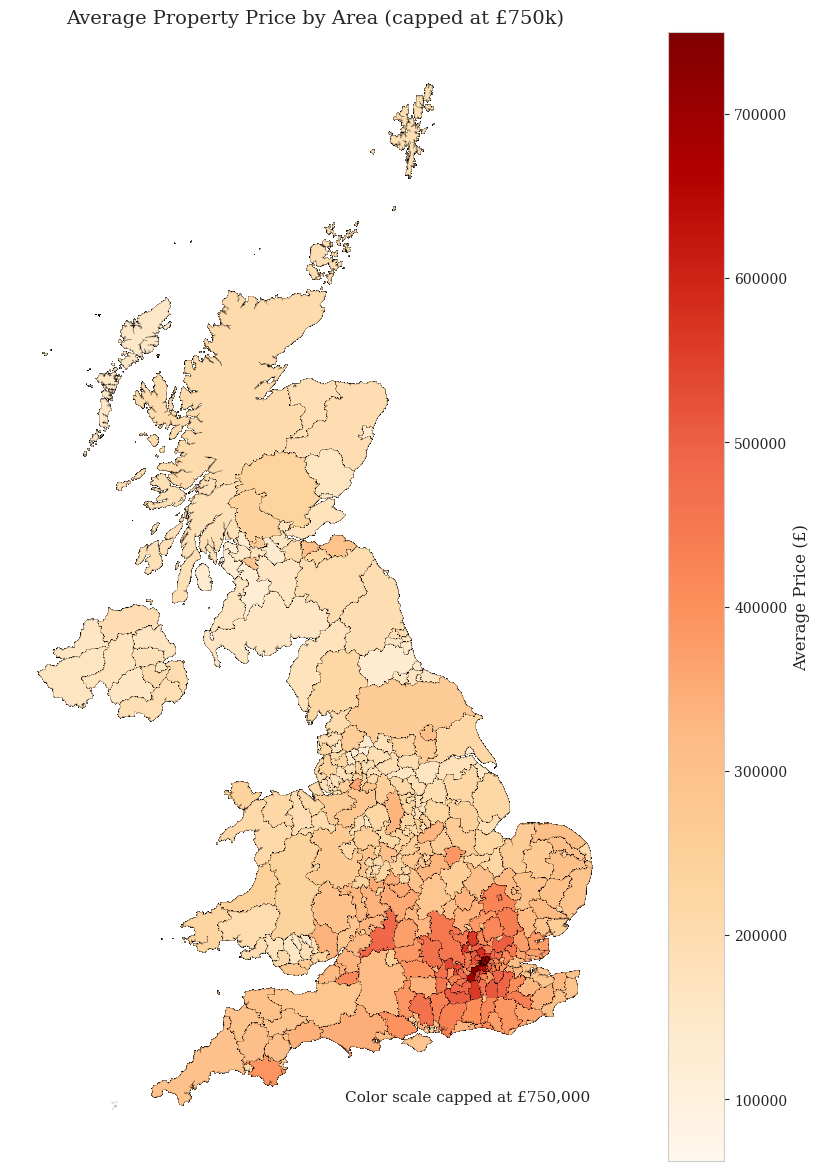

In [101]:
# Setting cap for color scale
vmin, vmax = gdf_merged['AveragePrice'].min(), 750_000

fig, ax = plt.subplots(figsize=(10, 12))

gdf_merged.plot(
    column='AveragePrice',
    cmap='OrRd',
    vmin=vmin,
    vmax=vmax,
    linewidth=0.1,
    edgecolor='black',
    legend=True,
    legend_kwds={
        'label': "Average Price (£)",
        'orientation': "vertical",
    },
    missing_kwds={
        'color': 'lightgrey',
        'edgecolor': 'darkgrey',
        'hatch': '///',
        'label': 'No data',
    },
    ax=ax
)

# Annotate the cap
ax.text(
    0.95, 0.05,
    f"Color scale capped at £{vmax:,.0f}",
    transform=ax.transAxes,
    ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8)
)

ax.set_title(f"Average Property Price by Area (capped at £{vmax/1e3:.0f}k)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Seasonal Trends in House Prices'}, xlabel='Month'>

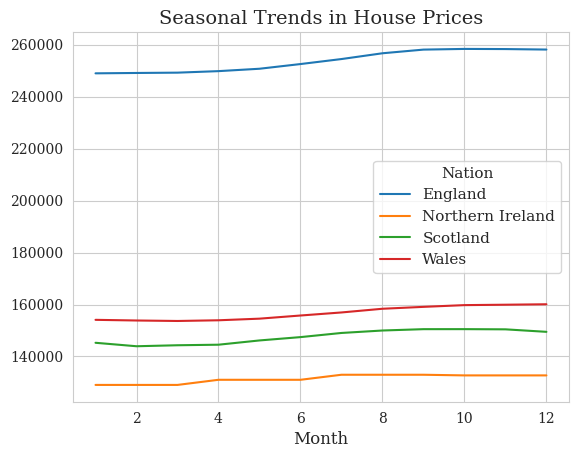

In [102]:
# Seasonality Analysis

df["Month"] = df["Date"].dt.month
seasonality = df.groupby(["Nation", "Month"])["AveragePrice"].mean().unstack()
seasonality.T.plot(title="Seasonal Trends in House Prices")